In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold

In [2]:
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
# This is the function to create new columns from the description columns
interests = ['python', 'machine learning', 'deep learning', 'engineer','data science','artificial intelligence', 'nlp','cs','computers','follow','followback']
def new_column(string):
    df[string] = np.where(df['description'].str.lower().str.contains(string)==True,1,0)

In [4]:
df = pd.read_csv("Twitter_MOST_New.csv")
df.head()

,Unnamed: 0,username,user_id,description,url_count,protected,followers_count,friends_count,user_created_at,user_favourites_count,utc_offset,geo_enabled,veified,user_statuses_count,contributors_enabled,translation_enabled,user_follows_me,user_is_friend
0,0,castolosan,251924369,Developer and PhD student. Deep Neural Alchemi...,NaN,False,704,4229,2011,1116,NaN,False,False,2857,False,False,1,1
1,1,mostafa_albana_,229952696,#machinelearning #bigdata #datascience #java #...,1.0,False,561,2266,2010,258,NaN,False,False,260,False,False,0,1
2,2,Smrdas85,926455288089026561,Graphics Designing Engineering at Sun Flower G...,1.0,False,237,1725,2017,8169,NaN,True,False,3486,False,False,0,1
3,3,denisniskim,2901993755,Son of God🙇‍♂️Strategist✍️Environmentalist🌴Tec...,1.0,False,63,1155,2014,312,NaN,False,False,117,False,False,0,1
4,4,BHARGAVAANIL,135140166,AN ALUMNI OF PANJAB UNIVERSITY AND A LAW GRADU...,NaN,False,1024,3465,2010,1921,NaN,True,False,4722,False,False,0,1


In [5]:
df.columns

Index(['Unnamed: 0', 'username', 'user_id', 'description', 'url_count',
       'protected', 'followers_count', 'friends_count', 'user_created_at',
       'user_favourites_count', 'utc_offset', 'geo_enabled', 'veified',
       'user_statuses_count', 'contributors_enabled', 'translation_enabled',
       'user_follows_me', 'user_is_friend'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# Calling function to create new columns

for i in interests:
    new_column(i)


# missing values

In [8]:
df.isnull().sum()

username                      0
user_id                       0
description                   1
url_count                   801
protected                     0
followers_count               0
friends_count                 0
user_created_at               0
user_favourites_count         0
utc_offset                 1950
geo_enabled                   0
veified                       0
user_statuses_count           0
contributors_enabled          0
translation_enabled           0
user_follows_me               0
user_is_friend                0
python                        0
machine learning              0
deep learning                 0
engineer                      0
data science                  0
artificial intelligence       0
nlp                           0
cs                            0
computers                     0
follow                        0
followback                    0
dtype: int64

In [9]:
df.drop(['utc_offset'],axis=1,inplace=True)
df.url_count.fillna(0,inplace=True) #url count for users is 0 hence it is showing a null value, thats why replacing it with 0

In [10]:
# We have extracted information from the description columns hence not required.
df.drop(['description'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

username                   0
user_id                    0
url_count                  0
protected                  0
followers_count            0
friends_count              0
user_created_at            0
user_favourites_count      0
geo_enabled                0
veified                    0
user_statuses_count        0
contributors_enabled       0
translation_enabled        0
user_follows_me            0
user_is_friend             0
python                     0
machine learning           0
deep learning              0
engineer                   0
data science               0
artificial intelligence    0
nlp                        0
cs                         0
computers                  0
follow                     0
followback                 0
dtype: int64

In [12]:
# Hence handle all the missing values

# Dropping the Irrelevent columns.

In [13]:
df.head()

,username,user_id,url_count,protected,followers_count,friends_count,user_created_at,user_favourites_count,geo_enabled,veified,...,machine learning,deep learning,engineer,data science,artificial intelligence,nlp,cs,computers,follow,followback
0,castolosan,251924369,0.0,False,704,4229,2011,1116,False,False,...,0,0,0,0,0,0,0,0,0,0
1,mostafa_albana_,229952696,1.0,False,561,2266,2010,258,False,False,...,0,0,1,0,0,0,0,0,0,0
2,Smrdas85,926455288089026561,1.0,False,237,1725,2017,8169,True,False,...,0,0,1,0,0,0,1,0,0,0
3,denisniskim,2901993755,1.0,False,63,1155,2014,312,False,False,...,0,0,0,0,0,0,0,0,0,0
4,BHARGAVAANIL,135140166,0.0,False,1024,3465,2010,1921,True,False,...,0,0,0,0,0,0,1,0,0,0


In [14]:
# These columns have either large number of unique Values or a single value for all the obeservations. 
df.drop(['username','user_id','protected'],axis=1,inplace=True)
df.head()

,url_count,followers_count,friends_count,user_created_at,user_favourites_count,geo_enabled,veified,user_statuses_count,contributors_enabled,translation_enabled,...,machine learning,deep learning,engineer,data science,artificial intelligence,nlp,cs,computers,follow,followback
0,0.0,704,4229,2011,1116,False,False,2857,False,False,...,0,0,0,0,0,0,0,0,0,0
1,1.0,561,2266,2010,258,False,False,260,False,False,...,0,0,1,0,0,0,0,0,0,0
2,1.0,237,1725,2017,8169,True,False,3486,False,False,...,0,0,1,0,0,0,1,0,0,0
3,1.0,63,1155,2014,312,False,False,117,False,False,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1024,3465,2010,1921,True,False,4722,False,False,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# First converting them to 'object' type
df['geo_enabled'] = df['geo_enabled'].astype(str)
df['veified'] = df['veified'].astype(str)
df['contributors_enabled'] = df['contributors_enabled'].astype(str)
df['translation_enabled'] = df['translation_enabled'].astype(str)

In [16]:
# Mapping True with 1 and False with 0
df.geo_enabled.replace(['True','False'],[1, 0],inplace=True)
df.veified.replace(['True','False'],[1, 0],inplace=True)
df.contributors_enabled.replace(['True','False'],[1, 0],inplace=True)
df.translation_enabled.replace(['True','False'],[1, 0],inplace=True)

# Cross validation split 

In [17]:
X = df.drop(['user_follows_me'],axis=1)
y = df['user_follows_me']

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle=True,random_state=27)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1462, 22), (488, 22), (1462,), (488,))

In [20]:
y_train.value_counts()

0    1258
1     204
Name: user_follows_me, dtype: int64

In [21]:
y_test.value_counts()

0    421
1     67
Name: user_follows_me, dtype: int64

In [22]:
X_train.head()

,url_count,followers_count,friends_count,user_created_at,user_favourites_count,geo_enabled,veified,user_statuses_count,contributors_enabled,translation_enabled,...,machine learning,deep learning,engineer,data science,artificial intelligence,nlp,cs,computers,follow,followback
788,1.0,2240,630,2009,2654,1,0,37910,0,0,...,0,0,1,0,0,0,0,0,0,0
591,1.0,604,577,2009,280,1,0,5467,0,0,...,0,0,0,1,0,0,0,0,0,0
1765,0.0,18369,17670,2014,1821,0,0,2328,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,0.0,198,1094,2017,136,0,0,52,0,0,...,0,0,0,0,0,0,0,0,0,0
757,1.0,6564,4276,2011,4515,1,0,5679,0,0,...,0,0,1,0,0,0,1,0,0,0


# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
predictions_RFC = RFC.predict(X_test)

metrics.accuracy_score(y_test,predictions_RFC)

0.8545081967213115

In [26]:
metrics.f1_score(y_test,predictions_RFC)

0.027397260273972605

In [27]:
print(metrics.classification_report(y_test,predictions_RFC))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       421
           1       0.17      0.01      0.03        67

    accuracy                           0.85       488
   macro avg       0.51      0.50      0.47       488
weighted avg       0.77      0.85      0.80       488



# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions_LR = LR.predict(X_test)

metrics.accuracy_score(y_test,predictions_LR)

0.8627049180327869

In [31]:
metrics.f1_score(y_test,predictions_LR)

0.0

In [32]:
print(metrics.classification_report(y_test,predictions_LR))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       421
           1       0.00      0.00      0.00        67

    accuracy                           0.86       488
   macro avg       0.43      0.50      0.46       488
weighted avg       0.74      0.86      0.80       488



# Feature Selection 

In [33]:
Important = pd.DataFrame({'Columns':X.columns,'importances':RFC.feature_importances_*100})
Important

,Columns,importances
0,url_count,2.582785
1,followers_count,19.028500
2,friends_count,18.781397
3,user_created_at,9.845885
4,user_favourites_count,18.861027
5,geo_enabled,1.736908
6,veified,0.154856
7,user_statuses_count,19.060563
8,contributors_enabled,0.000000
9,translation_enabled,0.073813


In [34]:
list(Important[Important['importances']>2]['Columns'])

['url_count',
 'followers_count',
 'friends_count',
 'user_created_at',
 'user_favourites_count',
 'user_statuses_count']

In [35]:
New_X = X.loc[:,list(Important[Important['importances']>2]['Columns'])
             ]
New_X.head()

,url_count,followers_count,friends_count,user_created_at,user_favourites_count,user_statuses_count
0,0.0,704,4229,2011,1116,2857
1,1.0,561,2266,2010,258,260
2,1.0,237,1725,2017,8169,3486
3,1.0,63,1155,2014,312,117
4,0.0,1024,3465,2010,1921,4722


In [36]:
X_train,X_test,y_train,y_test = train_test_split(New_X,y,test_size=0.25,random_state=27) 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1462, 6), (1462,), (488, 6), (488,))

# Upsampling

In [37]:
from sklearn.utils import resample

In [38]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1462, 6), (1462,), (488, 6), (488,))

In [39]:
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_following = X[X.user_follows_me==0]
following = X[X.user_follows_me==1]

# upsample minority
following_upsampled = resample(following,
                          replace=True, # sample with replacement
                          n_samples=len(not_following), # match number in majority class
                          random_state=27) # reproducible results


In [40]:
# combine majority and upsampled minority
upsampled = pd.concat([not_following, following_upsampled])

# check new class counts
upsampled.user_follows_me.value_counts()
   

1    1258
0    1258
Name: user_follows_me, dtype: int64

In [41]:
X_train = upsampled.drop(['user_follows_me'],axis=1)
y_train = upsampled.loc[:,['user_follows_me']]


In [42]:
X_train.shape,y_train.shape

((2516, 6), (2516, 1))

In [43]:
# Random Forest After Resampling

In [44]:
RFC_1 = RandomForestClassifier()
RFC_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
predictions_RFC1 = RFC_1.predict(X_test)

print("The Accuracy score is : {} ".format(metrics.accuracy_score(y_test,predictions_RFC1)))
print("The F1 Score is : {}".format(metrics.f1_score(y_test,predictions_RFC1)))

The Accuracy score is : 0.8340163934426229 
The F1 Score is : 0.12903225806451613


In [46]:
print(metrics.classification_report(y_test,predictions_RFC1))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       421
           1       0.23      0.09      0.13        67

    accuracy                           0.83       488
   macro avg       0.55      0.52      0.52       488
weighted avg       0.78      0.83      0.80       488



In [47]:
# XGBoost after Upsampling 

In [48]:
from xgboost import XGBClassifier

In [49]:
XGB = XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [50]:
predictions_XGB = XGB.predict(X_test)

print("The Accuracy score is : {} ".format(metrics.accuracy_score(y_test,predictions_XGB)))
print("The F1 Score is : {}".format(metrics.f1_score(y_test,predictions_XGB)))

The Accuracy score is : 0.6700819672131147 
The F1 Score is : 0.2907488986784141


In [51]:
print(metrics.classification_report(y_test,predictions_XGB))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79       421
           1       0.21      0.49      0.29        67

    accuracy                           0.67       488
   macro avg       0.55      0.60      0.54       488
weighted avg       0.80      0.67      0.72       488



In [52]:
# downsampling

In [53]:
not_following_downsampled = resample(not_following,
                                replace = False, # sample without replacement
                                n_samples = len(following), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_following_downsampled,following])

In [54]:
# checking counts
downsampled.user_follows_me.value_counts()


1    204
0    204
Name: user_follows_me, dtype: int64

In [55]:
X_train = downsampled.drop(['user_follows_me'],axis=1)
y_train = downsampled.loc[:,['user_follows_me']]


In [56]:
# Random Forest

In [57]:
RFC_2 = RandomForestClassifier()
RFC_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
predictions_RFC2 = RFC_2.predict(X_test)

print("The Accuracy score is : {} ".format(metrics.accuracy_score(y_test,predictions_RFC2)))
print("The F2 Score is : {}".format(metrics.f1_score(y_test,predictions_RFC2)))

The Accuracy score is : 0.610655737704918 
The F2 Score is : 0.29629629629629634


In [59]:
print(metrics.classification_report(y_test,predictions_RFC2))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73       421
           1       0.20      0.60      0.30        67

    accuracy                           0.61       488
   macro avg       0.55      0.60      0.51       488
weighted avg       0.81      0.61      0.67       488



In [60]:
# XGBoost

In [61]:
XGB1 = XGBClassifier()
XGB1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [62]:
predictions_XGB1 = XGB1.predict(X_test)

print("The Accuracy score is : {} ".format(metrics.accuracy_score(y_test,predictions_XGB1)))
print("The F1 Score is : {}".format(metrics.f1_score(y_test,predictions_XGB1)))

The Accuracy score is : 0.5471311475409836 
The F1 Score is : 0.2608695652173913


In [63]:
print(metrics.classification_report(y_test,predictions_XGB1))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67       421
           1       0.17      0.58      0.26        67

    accuracy                           0.55       488
   macro avg       0.53      0.56      0.47       488
weighted avg       0.79      0.55      0.62       488



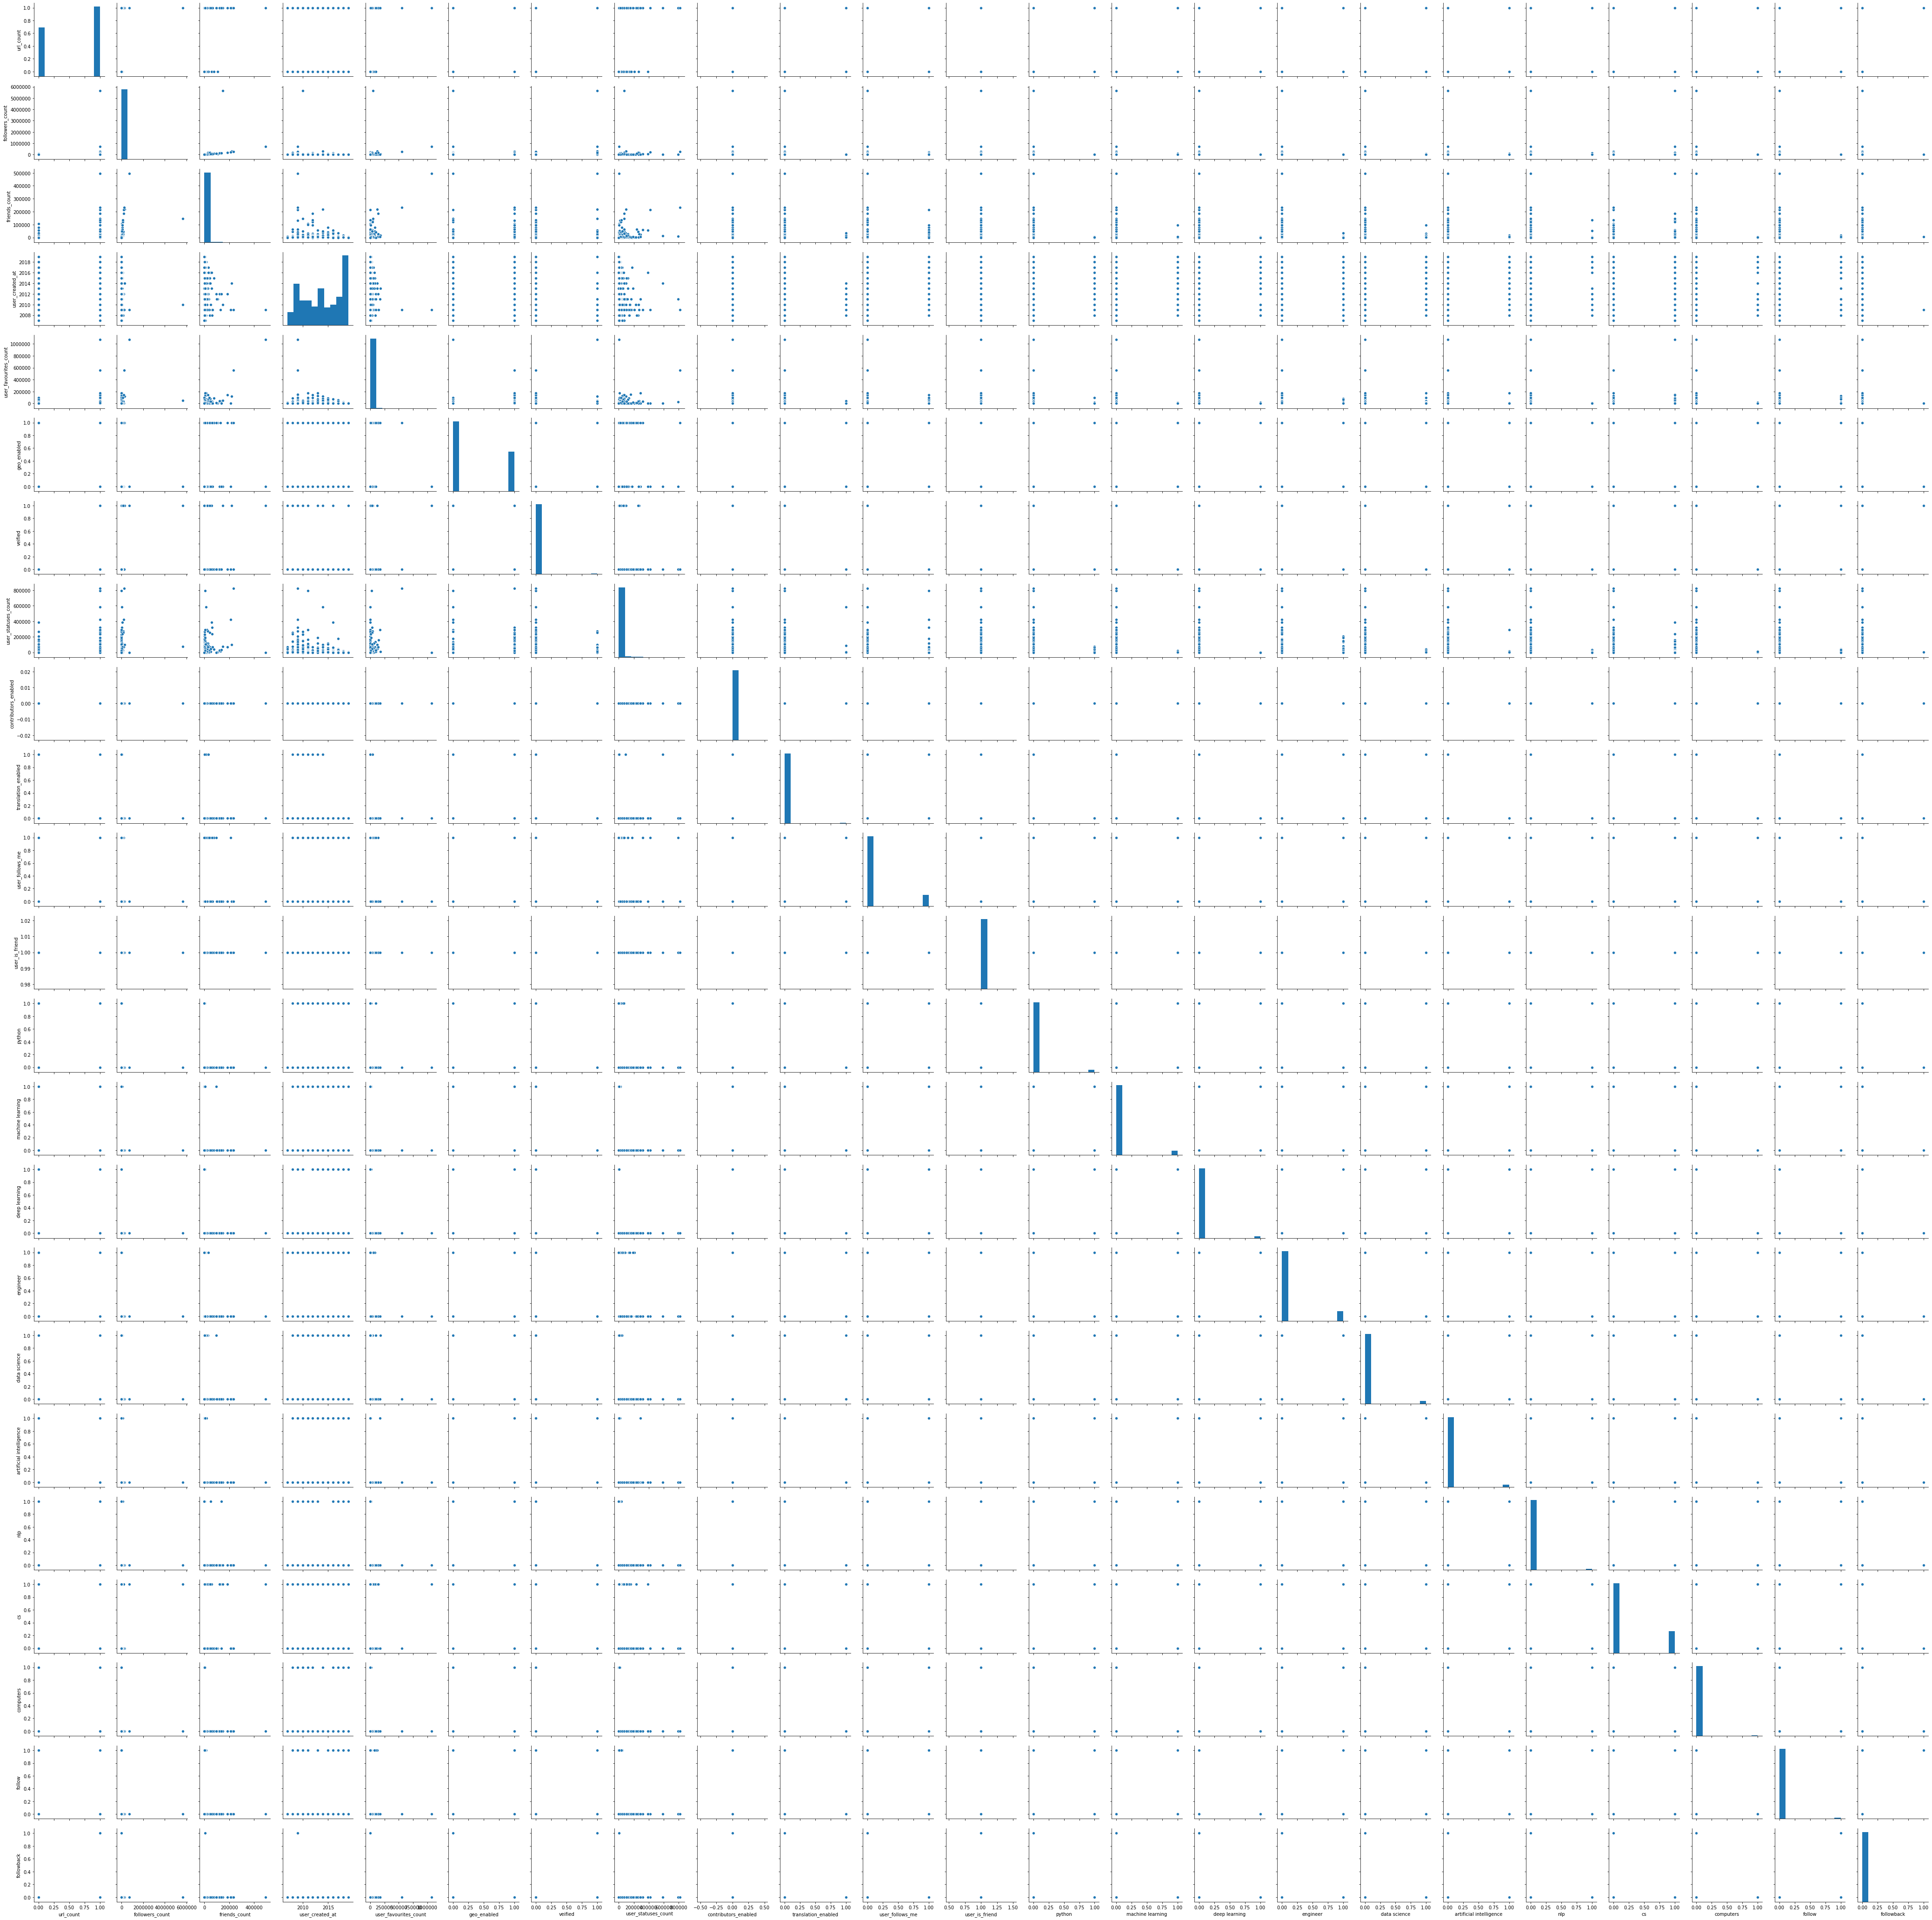

In [66]:
sns.pairplot(df)

# Feature Importance Comparison for XGB 

In [65]:
XGB.feature_importances_

array([0.15909798, 0.16611351, 0.2156893 , 0.14011963, 0.16265239,
       0.15632717], dtype=float32)

In [70]:
G=df[['url_count','followers_count','friends_count','user_created_at','user_favourites_count','user_statuses_count']]

In [71]:
feature_importances = pd.DataFrame(XGB.feature_importances_,index =G.columns ,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [72]:
feature_importances = feature_importances.sort_values(by = 'importance')

In [73]:
feature_importances

,importance
user_created_at,0.140120
user_statuses_count,0.156327
url_count,0.159098
user_favourites_count,0.162652
followers_count,0.166114
friends_count,0.215689


Text(0.5, 1.0, 'XGBOOST Classifier')

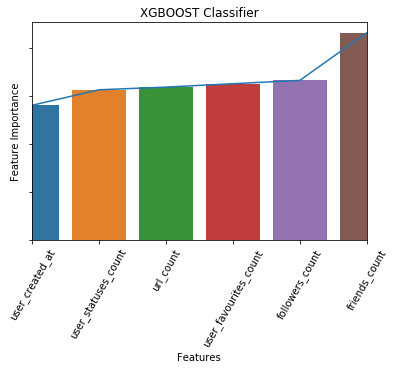

In [74]:
barg = sns.barplot(y = 'importance',x = feature_importances.index,data = feature_importances)
lineg = feature_importances['importance'].plot()
barg.set_xticklabels(feature_importances.index,rotation = 60)
barg.set_yticklabels([])
barg.set_xlabel('Features',fontdict=None)
barg.set_ylabel('Feature Importance',fontdict=None)
barg.set_title('XGBOOST Classifier',fontdict=None)